<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/homeworks/h1/hw_01.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea N°02


## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Renata Córdova

* __Rol__: 202010522-7

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
   
4.- Esta Tarea debe ser entregada en **Dos Jupyter Notebooks Distinto**.
   * **Ejemplo**: `hw_02_part_01.ipynb`, `hw_02_part_02.ipynb`.

## II.- Titanic - Machine Learning from Disaster


<img src="https://drive.google.com/uc?export=view&id=1dsHUmSqyCYvez1LRlieo_y06haGL6t9r" width = "300" align="center"/>



###  The Challenge

El hundimiento del Titanic es uno de los naufragios más infames en la historia.

El 15 de abril de 1912, durante su viaje inaugural, el ampliamente considerado "insumergible" RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había botes salvavidas suficientes para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Aunque hubo cierto elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, te pedimos que construyas un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (como nombre, edad, género, clase socioeconómica, etc.).


###  What Data Will I Use in This Competition?

En esta competición, tendrás acceso a dos conjuntos de datos similares que incluyen información de pasajeros como nombre, edad, género, clase socioeconómica, etc. Un conjunto de datos se titula `train.csv` y el otro se titula `test.csv`.

`Train.csv` contendrá los detalles de un subconjunto de los pasajeros a bordo (exactamente 891) y, lo que es más importante, revelará si sobrevivieron o no, también conocido como la "verdad fundamental" (ground truth).

El conjunto de datos `test.csv` contiene información similar pero no revela la "verdad fundamental" para cada pasajero. Tu tarea es predecir estos resultados.

Utilizando los patrones que encuentres en los datos de `train.csv`, predice si los otros 418 pasajeros a bordo (encontrados en `test.csv`) sobrevivieron.


### Submission File Format:

Debes enviar un archivo CSV con exactamente 418 entradas más una fila de encabezado. Tu envío mostrará un error si tienes columnas adicionales (más allá de `PassengerId` y `Survived`) o filas adicionales.

El archivo debe tener exactamente 2 columnas:

- `PassengerId` (ordenado en cualquier orden)
- `Survived` (contiene tus predicciones binarias: 1 para sobrevivido, 0 para fallecido)


### Goal

Es tu responsabilidad predecir si un pasajero sobrevivió al hundimiento del Titanic o no. Para cada uno en el conjunto de prueba, debes predecir un valor de 0 o 1 para la variable.

###  Metric

Tu puntuación es el porcentaje de pasajeros que predices correctamente. Esto se conoce como [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification).

### Submission File Format
Debes enviar un archivo CSV con exactamente 418 entradas **más** una fila de encabezado. Tu envío mostrará un error si tienes columnas adicionales (más allá de PassengerId y Survived) o filas adicionales.

El archivo debe tener exactamente 2 columnas:

- PassengerId (ordenado en cualquier orden)
- Survived (contiene tus predicciones binarias: 1 para sobrevivido, 0 para fallecido)

**PassengerId,Survived**  
```
892,0  
893,1  
894,0  
Etc.
```

Puedes descargar un archivo de ejemplo para enviar (gender\_submission.csv) en la [Data page](https://www.kaggle.com/c/titanic/data).

### Hints

* Esto corresponde a un desafio de Kaggle ([link](https://www.kaggle.com/competitions/titanic/overview/description)).
* La información respecto a los datos, lo pueden encontrar en el siguiente [link](https://www.kaggle.com/competitions/titanic/data).
* A modo de inspiración, pueden ocupar algunos gráficos de otros participantes del desafío ([link](https://www.kaggle.com/competitions/titanic/code)).

## Importar librerías


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
import warnings
warnings.filterwarnings("ignore")

### Acceder a los datos

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = '/content/drive/MyDrive/data_sets/titanic/'
files = os.listdir(folder_path)

In [4]:
dataframes = {}  # Diccionario para almacenar los DataFrames

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df_name = file.split('.')[0]  # Usa el nombre del archivo como clave del diccionario
        dataframes[df_name] = pd.read_csv(file_path)
dataframes.keys()

dict_keys(['gender_submission', 'test', 'train', 'submission'])

In [5]:
df_gender_sub = dataframes['gender_submission']
df_test = dataframes['test']
df_train = dataframes['train']

## EDA

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Comentario:**

El dataframe contiene 891 datos y 12 columnas_ el target ('Survived') y los atributos, tipo numéricos y categóricos.

Todos los datos están etiquetados, es decir, la columna 'Survived' (target) no presenta datos nulos.

Algunas columnas poseen datos nulos. Estas son:

- **Age** (numérica): 714 datos no nulos.
- **Cabin** (categórica): 204 datos no nulos.
- **Embarked** (categórica): 889 datos no nulos.

Dado que la columna 'Cabin' posee más datos nulos que no nulos, eliminaremos esta columna para no perturbar tanto la muestra.

Para la variable 'Age', reemplazaremos los datos nulos con la desviación estándar.

Para la variable 'Embarked', reemplazaremos con la moda.

In [8]:
df_train2 = df_train.copy()

df_train2 = df_train2.drop('Cabin', axis=1)

std_age = df_train2['Age'].std()
df_train2['Age'] = df_train2['Age'].fillna(std_age)

moda_embarked = df_train2['Embarked'].mode().iloc[0]
df_train2['Embarked'] = df_train2['Embarked'].fillna(moda_embarked)

In [9]:
df_train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Comentario:** Ya no hay datos nulos.


In [10]:
df_train2['PassengerId'].nunique()

891

**Comentario:** La columna 'PassangerId' identifica cada dato del dataframe. Además, importante, no existen 2 o más reportes de un mismo pasajero.

In [11]:
# Establecer la columna 'PassengerId' como índice del dataframe:
df_train2 = df_train2.set_index('PassengerId')
df_train2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,14.526497,1,2,W./C. 6607,23.4500,S


In [12]:
# Target / Features:
y_train = df_train2['Survived']#.values
X_train = df_train2.drop('Survived', axis=1)#.values

In [13]:
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Comentario:** Los datos están ligeramente desbalanceados, pero la situación no es grave.

In [14]:
# Dataframe con variables numéricas:
df_num = X_train.select_dtypes(include='number')
df_num.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [15]:
# Dataframe con variables categóricas:
df_categ = X_train.select_dtypes(include=['object'])
df_categ.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


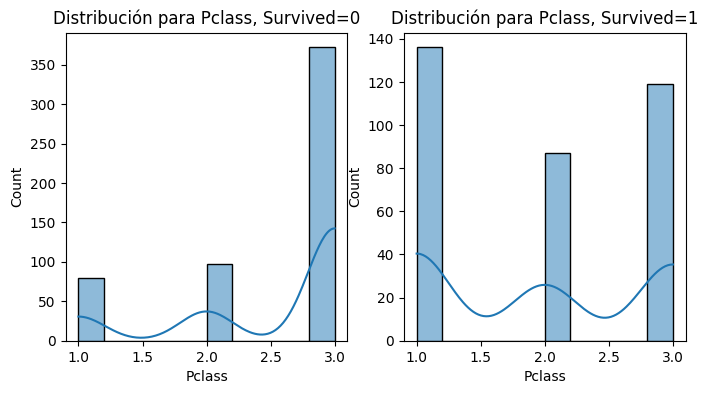

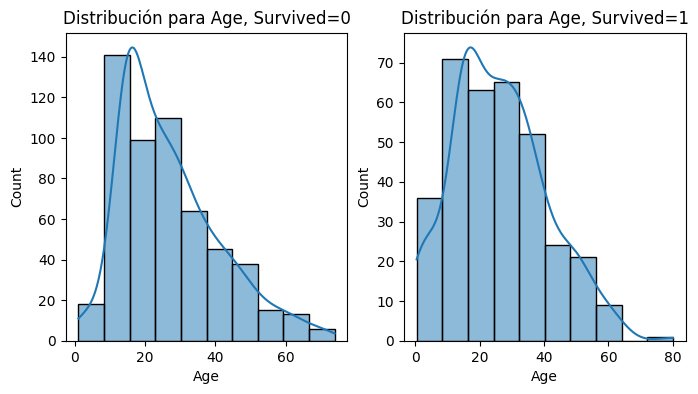

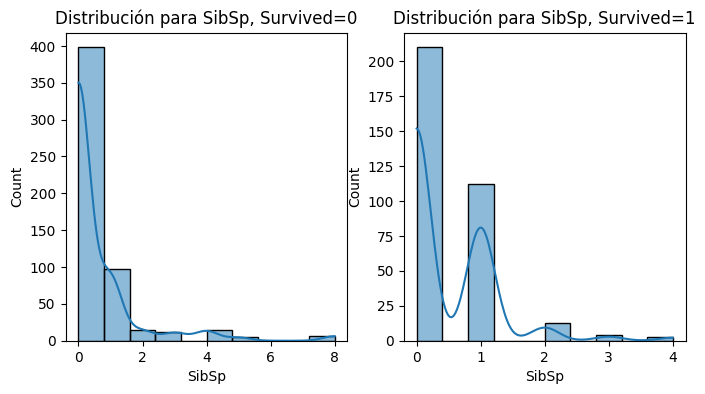

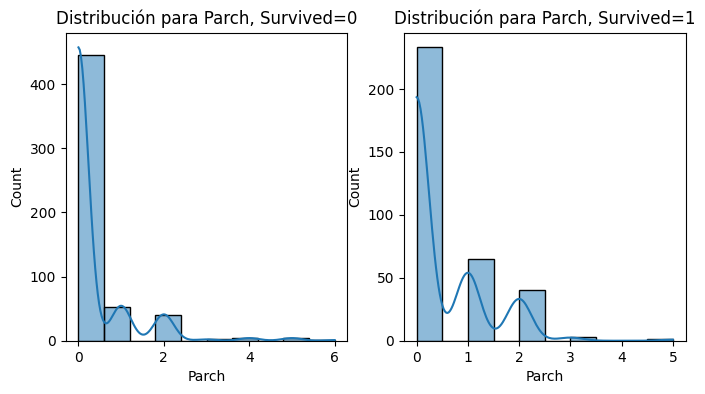

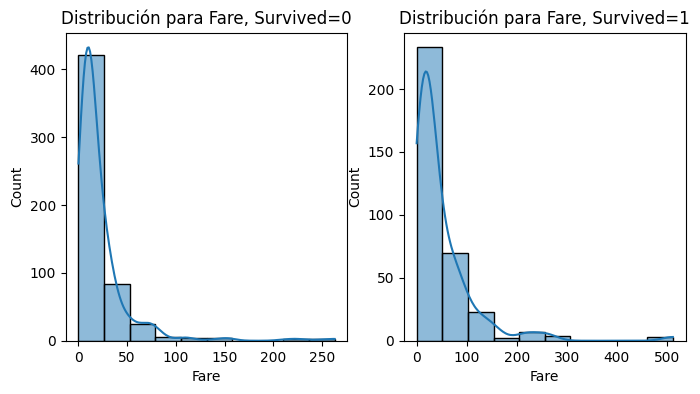

In [16]:
# Dispersión de los atributos numéricos por clase:
for col in df_num.columns.values:
    fig, ax = plt.subplots(figsize=(8, 4), ncols=2)

    # Gráfico para 'Survived' == 0
    sns.histplot(x=df_train2[col][df_train2['Survived'] == 0], kde=True, bins=10, ax=ax[0])
    ax[0].set_title(f'Distribución para {col}, Survived=0')

    # Gráfico para 'Survived' == 1
    sns.histplot(x=df_train2[col][df_train2['Survived'] == 1], kde=True, bins=10, ax=ax[1])
    ax[1].set_title(f'Distribución para {col}, Survived=1')

    plt.show()


**Comentario:** Se observa una leve diferencia en la distribución de los datos de los atributos numéricos. Sin embargo, no permite discriminar de manera clara la relevancia de las variables sobre la supervivencia de los pasajeros.

In [17]:
df_categ.nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

**Comentario:** Las variables 'Ticket' y 'Name' no permiten separar las clases por ser demasiado específicas. Por lo tanto, eliminaremos estas columnas.

In [18]:
df_categ = df_categ.drop(['Name', 'Ticket'], axis=1)

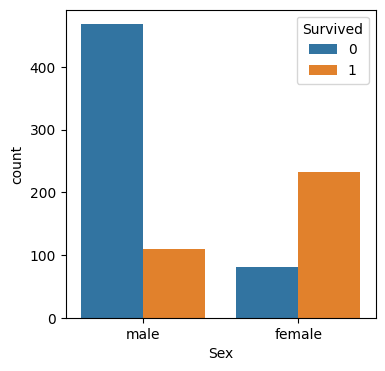

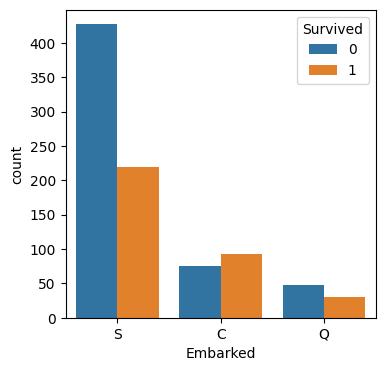

In [19]:
# Dispersión de los atributos categóricos por clase:
for col in df_categ.columns.values:
    fig = plt.figure(figsize=(4, 4))

    sns.countplot(x=df_train2[col], hue=df_train2['Survived'])
    ax[0].set_title(f'Distribución para {col}')

    plt.show()


**Comentario:** Se observa la relevancia del sexo en la supervivencia del pasajero y, por el contrario, la poca relevancia de la variable 'Embarked', ya que ambas clases se distribuyen de la misma forma.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns, index = X_train.index)
print('Datos numéricos estandarizados:')
display(df_num_scaled.head())

Datos numéricos estandarizados:


,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,1.0,0.271174,0.125,0.0,0.014151
2,0.0,0.472229,0.125,0.0,0.139136
3,1.0,0.321438,0.000,0.0,0.015469
4,0.0,0.434531,0.125,0.0,0.103644
5,1.0,0.434531,0.000,0.0,0.015713


In [21]:
from sklearn.feature_selection import f_classif

scores = []
for col in df_num.columns.values:
  x = df_num_scaled[col].values.reshape(-1, 1)
  score = f_classif(x, y_train)[0][0]
  scores.append(score)

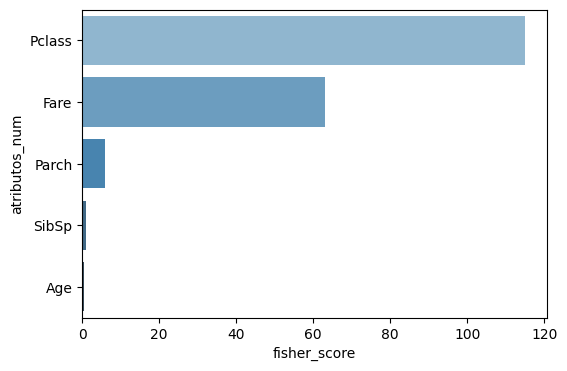

In [22]:
fig, axes = plt.subplots(figsize=(6,4), nrows=1, ncols=1)
plot_data = pd.DataFrame({'atributos_num': df_num.columns.values, 'fisher_score': scores})
plot_data = plot_data.sort_values(by='fisher_score', ascending=False)
p = sns.barplot(data=plot_data, x='fisher_score', y='atributos_num', palette="Blues_d",ax=axes)
plt.show()

**Comentario:** Los atributos numéricos más relevantes son 'Pclass' y 'Fare', basandonos en la puntuación fisher-score entre cada una de estas con el target.

In [23]:
from sklearn.feature_selection import mutual_info_classif as mi
from sklearn.preprocessing import LabelEncoder

scores = []
for col in df_categ.columns.values:
  x = LabelEncoder().fit_transform(df_train2[col]).reshape(-1,1)
  score = mi(x, y_train, discrete_features=True)[0]
  scores.append(score)

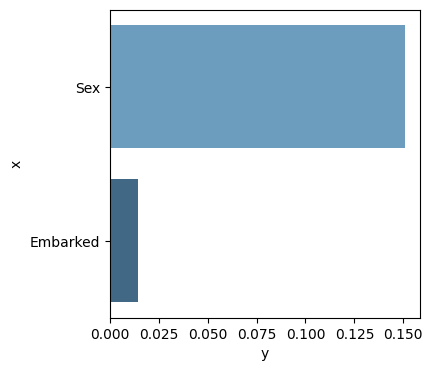

In [24]:
fig, axes = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
plot_data = pd.DataFrame({'x': df_categ.columns.values, 'y': scores})
plot_data = plot_data.sort_values(by='y', ascending=False)
p = sns.barplot(data=plot_data,x='y', y='x', palette="Blues_d",ax=axes)
plt.show()

**Comentario:** Tal como se intuía a partir de la visualización, el atributo 'Sex' es muy relevante para la predicción, a diferencia de 'Embarked'. Esto, en base a la información mutua entre cada atributo con el target.

**Comentario:** La desventaja de recortar variables en base a la puntuación fisher-score y de la información mutua es que se tratan de métodos de filtrado **individual**, es decir, no tienen la capacidad de detectar redundancias ni complementariedades entre atributos.

In [25]:
df_num_procesado = df_num_scaled[['Pclass', 'Fare']]
df_num_procesado.head()

,Pclass,Fare
PassengerId,,
1,1.0,0.014151
2,0.0,0.139136
3,1.0,0.015469
4,0.0,0.103644
5,1.0,0.015713


In [26]:
df_categ_procesado = pd.get_dummies(df_categ['Sex'])
df_categ_procesado.head()

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


### 2 ALTERNATIVAS:

**CELDA 1:**

In [27]:
'''
X_train_procesado = pd.concat([df_num_procesado, df_categ_procesado], axis=1)
X_train_procesado.head()
'''

'\nX_train_procesado = pd.concat([df_num_procesado, df_categ_procesado], axis=1)\nX_train_procesado.head()\n'

**CELDA 2:**

In [28]:
X_train_procesado = pd.concat([df_num_scaled, df_categ_procesado], axis=1)
X_train_procesado.head()

,Pclass,Age,SibSp,Parch,Fare,female,male
PassengerId,,,,,,,
1,1.0,0.271174,0.125,0.0,0.014151,0,1
2,0.0,0.472229,0.125,0.0,0.139136,1,0
3,1.0,0.321438,0.000,0.0,0.015469,1,0
4,0.0,0.434531,0.125,0.0,0.103644,1,0
5,1.0,0.434531,0.000,0.0,0.015713,0,1


## Entrenamiento

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instanciar modelos:
lr = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()

### Grid Search: Logistic Regressor

In [30]:
# Parámetros:
param_grid_lr = {'penalty' : ['l1', 'l2'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'class_weight' : ['balanced', None]
                 }
param_grid_lr

# Aplicar greed search:
gs_lr = GridSearchCV(estimator = lr,
                  param_grid = param_grid_lr,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs_lr = gs_lr.fit(X_train_procesado, y_train)

# Imprimir resultados:
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.7867365513778168
{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}


### Grid Search: SVC

In [31]:
# Parámetros:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight' : ['balanced', None]
}

# Aplicar greed search:
gs_svc = GridSearchCV(estimator = svc,
                  param_grid = param_grid_svc,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs_svc = gs_svc.fit(X_train_procesado, y_train)

# Imprimir resultados:
print(gs_svc.best_score_)
print(gs_svc.best_params_)

0.8293892411022534
{'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'poly'}


### Grid Search: Random Forest Classifier

In [32]:
# Parámetros:
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight' : ['balanced', None]
}

# Aplicar greed search:
gs_rfc = GridSearchCV(estimator = rfc,
                  param_grid = param_grid_rfc,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs_rfc = gs_rfc.fit(X_train_procesado, y_train)

# Imprimir resultados:
print(gs_rfc.best_score_)
print(gs_rfc.best_params_)

0.8372920720607621
{'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


**Comentario:** El modelo con mejor desempeño obtenido es Random Forest Classifier dado por el grid search.

## Procesamiento Datos de Prueba


In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df_test2 = df_test.copy()

In [35]:
df_test2 = df_test2.set_index('PassengerId')

In [36]:
# Dataframe con variables numéricas:
df_num_test= df_test2.select_dtypes(include='number')
df_num_test.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
892,3,34.5,0,0,7.8292
893,3,47.0,1,0,7.0000
894,2,62.0,0,0,9.6875
895,3,27.0,0,0,8.6625
896,3,22.0,1,1,12.2875


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_test_scaled = scaler.fit_transform(df_num_test)
df_num_test_procesado = pd.DataFrame(df_num_test_scaled, columns=df_num_test.columns, index = df_num_test.index)
print('Datos numéricos estandarizados:')
display(df_num_test_procesado.head())

Datos numéricos estandarizados:


,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
892,0.873482,0.298549,-0.499470,-0.400248,-0.497811
893,0.873482,1.181328,0.616992,-0.400248,-0.512660
894,-0.315819,2.240662,-0.499470,-0.400248,-0.464532
895,0.873482,-0.231118,-0.499470,-0.400248,-0.482888
896,0.873482,-0.584229,0.616992,0.619896,-0.417971


In [38]:
# Reemplazar datos nulos por la media de cada columna
df_num_test_procesado = df_num_test_procesado.fillna(df_num_test_procesado.mean())

In [39]:
df_num_test_procesado.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [40]:
df_sex_test = df_test2['Sex']
df_sex_test

PassengerId
892       male
893     female
894       male
895       male
896     female
         ...  
1305      male
1306    female
1307      male
1308      male
1309      male
Name: Sex, Length: 418, dtype: object

In [41]:
df_sex_test.isnull().sum()

0

In [42]:
df_sex_procesado = pd.get_dummies(df_sex_test)
df_sex_procesado.head()

,female,male
PassengerId,,
892,0,1
893,1,0
894,0,1
895,0,1
896,1,0


**SI SE EJECUTÓ CELDA 1 EN LA ETAPA EDA: EJECUTAR CELDA SIGUIENTE**

In [43]:
'''
df_test_procesado = df_num_test_procesado[['Pclass', 'Fare']]
df_test_procesado.head()
'''

"\ndf_test_procesado = df_num_test_procesado[['Pclass', 'Fare']]\ndf_test_procesado.head()\n"

**SI SE EJECUTÓ CELDA 2 EN LA ETAPA EDA: EJECUTAR CELDA SIGUIENTE**

In [44]:
df_test_procesado = df_num_test_procesado
X_test_procesado = pd.concat([df_test_procesado, df_sex_procesado], axis=1)
X_test_procesado.head()

,Pclass,Age,SibSp,Parch,Fare,female,male
PassengerId,,,,,,,
892,0.873482,0.298549,-0.499470,-0.400248,-0.497811,0,1
893,0.873482,1.181328,0.616992,-0.400248,-0.512660,1,0
894,-0.315819,2.240662,-0.499470,-0.400248,-0.464532,0,1
895,0.873482,-0.231118,-0.499470,-0.400248,-0.482888,0,1
896,0.873482,-0.584229,0.616992,0.619896,-0.417971,1,0


### Predicción:

In [45]:
mejor_modelo = gs_rfc.best_estimator_
mejor_modelo.fit(X_train_procesado, y_train)
y_pred = mejor_modelo.predict(X_test_procesado)

### CSV Kaggle

In [46]:
# Ejemplo Kaggle:
df_gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [47]:
data = pd.DataFrame(y_pred, index = X_test_procesado.index)
data.rename(columns = {0 : 'Survived'}, inplace = True)
data = data.reset_index()
data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [48]:
csv_file_path = os.path.join(folder_path, 'submission.csv')
data.to_csv(csv_file_path, index=False)

## Resultados Kaggle
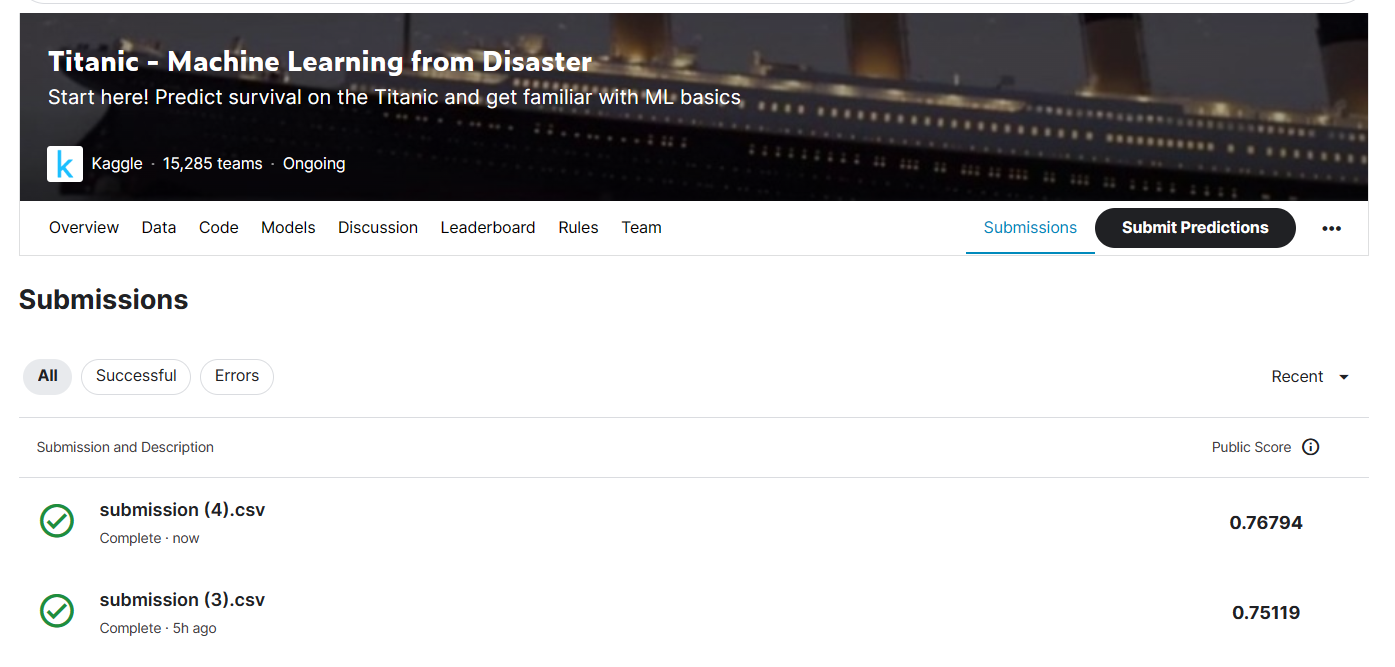

**Comentario:**

La submission (3) corresponde al resultado obtenido de ejecutar las celdas 1. Estas recortan las variables de bajo puntaje fisher-score. En cambio, submission (4), es de mantener todas las variables numéricas.